In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!nvidia-smi

Fri Oct 13 22:58:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load data

[Link to dataset and competition](https://www.kaggle.com/c/tweet-sentiment-extraction)

In [ ]:
import pandas as pd
from collections import defaultdict

In [ ]:
raw_data_train = pd.read_csv("train.csv")
raw_data_train = raw_data_train.dropna() #удаляем пустые колонки

In [ ]:
test_data_train = pd.read_csv("test.csv")
test_data_train = test_data_train.dropna() #удаляем пустые колонки

In [ ]:
raw_data_train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
test_data_train

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


# Dataset preparation

In [ ]:
def sentimentscoring(sentiment):
    if sentiment == 'positive':
        return "2"
    if sentiment == 'neutral':
        return "1"
    if sentiment == 'negative':
        return "0"

In [ ]:
raw_data_train['sentiment'] = raw_data_train['sentiment'].apply(sentimentscoring)

In [ ]:
raw_data_train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,2


In [ ]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [ ]:
raw_data_train['sentiment'] = raw_data_train['sentiment'].astype(float)

In [ ]:
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   textID         27480 non-null  object 
 1   text           27480 non-null  object 
 2   selected_text  27480 non-null  object 
 3   sentiment      27480 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
test_data_train['sentiment'] = test_data_train['sentiment'].apply(sentimentscoring)

In [ ]:
test_data_train

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,1
1,96d74cb729,Shanghai is also really exciting (precisely -...,2
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0
3,01082688c6,happy bday!,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,2
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0
3530,416863ce47,All alone in this old house again. Thanks for...,2
3531,6332da480c,I know what you mean. My little dog is sinkin...,0
3532,df1baec676,_sutra what is your next youtube video gonna b...,2


In [ ]:
import numpy as np
import torch

RANDOM_SEED = 42  #Инициализация генератора почти независимых друг от друга чисел
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from sklearn.model_selection import train_test_split

val_df, test_df = train_test_split(test_data_train, test_size = 0.5, random_state = RANDOM_SEED)

print(raw_data_train.shape, val_df.shape, test_df.shape)

(27480, 4) (1767, 3) (1767, 3)


In [ ]:
test_df['sentiment'] = test_df['sentiment'].astype(float)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 325 to 888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   textID     1767 non-null   object 
 1   text       1767 non-null   object 
 2   sentiment  1767 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.2+ KB


In [ ]:
val_df['sentiment'] = val_df['sentiment'].astype(float)

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 2242 to 3174
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   textID     1767 non-null   object 
 1   text       1767 non-null   object 
 2   sentiment  1767 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.2+ KB


# Pre-processing Text Dataset

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn.functional as F
from torch import nn, optim

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.5 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import AutoTokenizer
model_name = "bert-large-cased"

tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
MAX_LEN = 512
BATCH_SIZE = 64

In [ ]:
class CommentsDataset(Dataset): # Наследуем существующий класс Dataset

    # Расширяем его, вгружая компоненты через конструктор класса
    def __init__(self, comments, labels, tokenizer, max_len, include_raw_text=False):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.include_raw_text = include_raw_text

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comments = str(self.comments[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            comments,
            add_special_tokens=True,  # 'CLS' + 'SEP' токены для определения контекста
            max_length=self.max_len,  # max_length=512: Максимальная длина текста для BERT
            return_token_type_ids=False,
            return_attention_mask=True,
            truncation=True,  # truncation=True: Обрезает текст, если он слишком длинный
            padding=True,  # padding=True: Добавляет паддинг (заполнители), приводя текст к указанной максимальной длине (max_length)
            return_tensors='pt',  # return_tensors="pt": Возвращает тензоры для PyTorch
        )

        output = {
            'input_ids': encoding['input_ids'].flatten(), #те же token_ids
            'attention_mask': encoding['attention_mask'].flatten(), #принимает inputs_ids, затем указывает
            # какие token_ids игнорировать (0); какие стоит учитывать (1)
            'labels': torch.tensor(label, dtype=torch.long),
        }

        if self.include_raw_text:
            output['comments_text'] = comments

        return output

# Create Dataloaders

In [ ]:
#Импорт заполнителей

from transformers import DataCollatorWithPadding
collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True) #автоматически добавляет заполнители (нули) к данным перед обучением, приводя их тем самым к единой длине

In [ ]:
# Dataset до разбиений

merged_df = pd.concat([raw_data_train, val_df, test_df], axis = 0)

In [ ]:
#Создаём функцию, вызов которой формирует подходящий Dataloader

def create_data_loader(merged_df, tokenizer, max_len = MAX_LEN, batch_size = BATCH_SIZE, include_raw_text = False ):
    ds = CommentsDataset(
        comments =merged_df['text'].values,
        labels = merged_df.sentiment.to_list(),
        tokenizer=tokenizer,
        max_len=max_len,
        include_raw_text=include_raw_text
    )
    return DataLoader(ds, batch_size=BATCH_SIZE, collate_fn=collator ) #возвращаем loader c заполнителем

In [ ]:
# Создаем DataLoader'ы для каждого из наборов
train_loader = create_data_loader(raw_data_train, tokenizer, batch_size = BATCH_SIZE)
val_loader = create_data_loader(val_df, tokenizer, include_raw_text=False)
test_loader = create_data_loader(test_df, tokenizer, include_raw_text=False)

Dataloader quality test

In [ ]:
data = next(iter(train_loader))

print(data.keys()) # если dict_keys(['input_ids', 'attention_mask', 'labels'])
# тогда output работает успешно в магическом методе __getitem__

print(data['input_ids'].shape)

print(data['attention_mask'].shape)

print(data['labels'].shape)

dict_keys(['input_ids', 'attention_mask', 'labels'])
torch.Size([64, 75])
torch.Size([64, 75])
torch.Size([64])


# Model

In [ ]:
# Определите константы
NUM_CLASSES = len(raw_data_train['sentiment'].unique()) #число классов для нашего классификатора

In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
model_name = 'bert-large-cased'

class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(model_name, return_dict=False)
        self.drop = nn.Dropout(p = 0.2)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
            input_ids = input_ids,
            attention_mask= attention_mask
        )
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
model = SentimentClassifier(3)
model = model.to(device)

#3 - это число labels в sentiment

# Changing CPU to GPU

In [ ]:
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
F.softmax(model(input_ids,attention_mask), dim = 1) #добавляем конечный слой с мультиклассовым классификатором

tensor([[0.2526, 0.6111, 0.1364],
        [0.2415, 0.6048, 0.1537],
        [0.2904, 0.5401, 0.1695],
        [0.3167, 0.4564, 0.2269],
        [0.2785, 0.5316, 0.1899],
        [0.3423, 0.5023, 0.1555],
        [0.3861, 0.4199, 0.1940],
        [0.4998, 0.2152, 0.2850],
        [0.3741, 0.3984, 0.2275],
        [0.3948, 0.4539, 0.1512],
        [0.2337, 0.4500, 0.3163],
        [0.4913, 0.3619, 0.1468],
        [0.3765, 0.4663, 0.1572],
        [0.3298, 0.5134, 0.1568],
        [0.2957, 0.4033, 0.3011],
        [0.3678, 0.4446, 0.1876],
        [0.4279, 0.4181, 0.1540],
        [0.2904, 0.5177, 0.1919],
        [0.4462, 0.4466, 0.1071],
        [0.3778, 0.4092, 0.2130],
        [0.3982, 0.3981, 0.2037],
        [0.4146, 0.3601, 0.2253],
        [0.4602, 0.3149, 0.2248],
        [0.3773, 0.4240, 0.1987],
        [0.3686, 0.4491, 0.1823],
        [0.2043, 0.6377, 0.1580],
        [0.3917, 0.3677, 0.2406],
        [0.3931, 0.3066, 0.3003],
        [0.5259, 0.2711, 0.2030],
        [0.428

# Train the model

## Preparation

In [ ]:
from transformers import get_scheduler

In [ ]:
#Определяем оставшиеся гиперпараметры для управления процессом обучения
Epochs = 3
learning_rate = 5e-6 #замедляет движение по градиенту, способствуя более аккуратному подбору весов => замедляя скорость обучения
total_steps = len(train_loader) * Epochs

# для мульти классификации
loss_fn = nn.CrossEntropyLoss().to(device)

# Задаем оптимизатор (метод оптимизации): метод, позволяющий итеративно обновлять подходящие параметры, на основе уже вычисленного градиента
# скорости изменения (производной) вычисленной потери в результате конкретно подобранных параметров
optimizer = optim.AdamW(model.parameters(), lr= learning_rate)
scheduler = get_scheduler( #задаём планировщик скорости обучения с "разминой",
    #который помогает предотвратить резкие изменения весов в начале обучения
    "linear",
    optimizer=optimizer,
    num_warmup_steps=64, #число итераций в течение которых будет происходить "разминка"
    num_training_steps=total_steps
)

## Training, validating and testing

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train_model(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model=model.train()
    losses = []
    correct_predictions = 0

    for d in (pbar := tqdm(data_loader)):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim = 1)
        loss = loss_fn(outputs, labels)

        correct_predictions += torch.sum(preds == labels).cpu()

        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        pbar.set_description(f'loss: {loss:.5f}')

    return correct_predictions/n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            _,preds = torch.max(outputs, dim = 1)

            loss = loss_fn(outputs, labels.detach())
            correct_predictions += torch.sum(preds == labels).cpu()
            losses.append(loss.item())
    return correct_predictions/n_examples, np.mean(losses)

In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            probs = F.softmax(outputs, dim=1)
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(labels)

    predictions = torch.stack(predictions).cpu().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().numpy()
    real_values = torch.stack(real_values).cpu().numpy()

    label_mapping = {-1: "Negative", 0: "Neutral", 1: "Positive"}
    predictions = [label_mapping[label] for label in predictions]
    real_values = [label_mapping[label] for label in real_values]

    return predictions, prediction_probs, real_values

In [ ]:
import os

if not os.path.exists('model'):
    os.makedirs('model')

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(Epochs):
    print(f'Epoch {epoch + 1}/ {Epochs}')
    train_acc, train_loss = train_model(model, train_loader, loss_fn, optimizer, device, scheduler, len(raw_data_train))
    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(model, val_loader, loss_fn, device, len(val_df))
    print(f'Val loss {val_loss} accuracy {val_acc}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc>best_accuracy:
        torch.save(model.state_dict(), 'model/best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/ 3


  0%|          | 0/430 [00:00<?, ?it/s]

Train loss 0.8123549289481584 accuracy 0.6222343444824219
Val loss 0.5776997378894261 accuracy 0.7623090147972107
Epoch 2/ 3


  0%|          | 0/430 [00:00<?, ?it/s]

Train loss 0.5393012355233348 accuracy 0.7843886613845825
Val loss 0.5290929887975965 accuracy 0.7877758741378784
Epoch 3/ 3


  0%|          | 0/430 [00:00<?, ?it/s]

Train loss 0.4763833615668984 accuracy 0.812882125377655
Val loss 0.5300478764942714 accuracy 0.7860780954360962
CPU times: user 9min 1s, sys: 26 s, total: 9min 27s
Wall time: 9min 24s


# Evaluate

In [ ]:
train_accuracies = history['train_acc']
train_losses = history['train_loss']
val_accuracies = history['val_acc']
val_losses = history['val_loss']

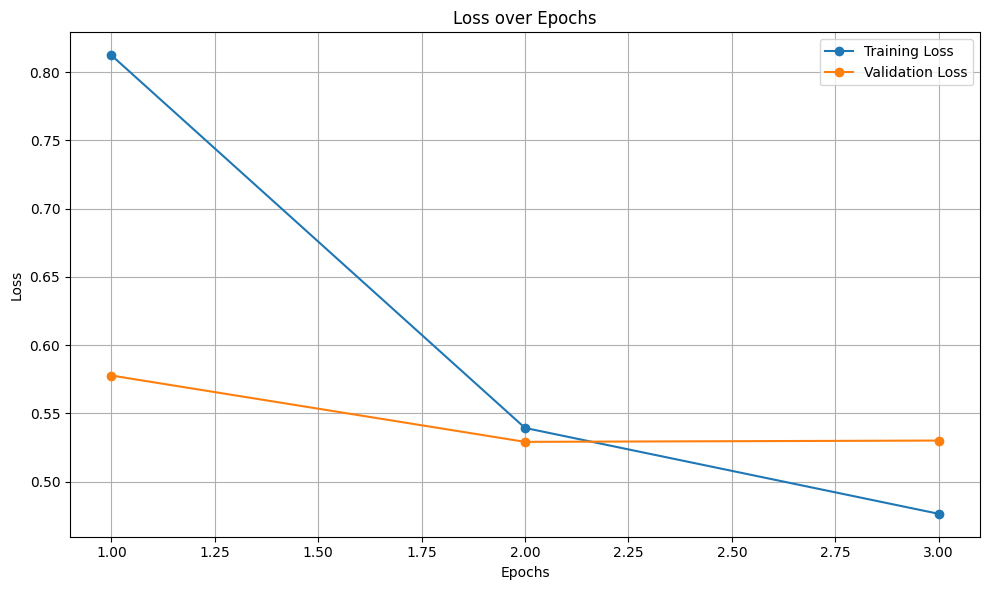

In [ ]:
import matplotlib.pyplot as plt

# Данные для графика
epochs = list(range(1, len(train_losses) + 1))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

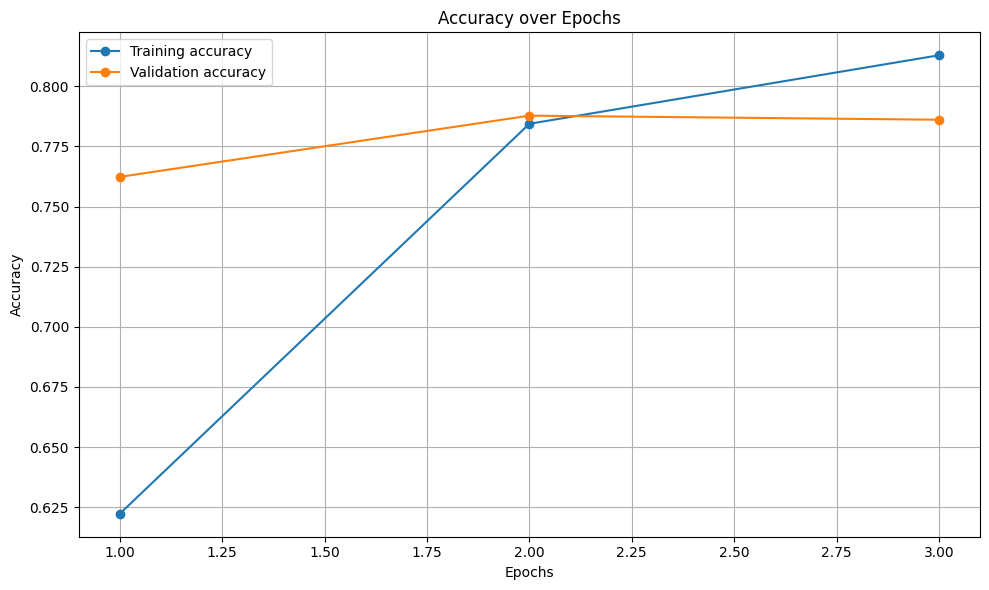

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label="Training accuracy", marker='o')
plt.plot(epochs, val_accuracies, label="Validation accuracy", marker='o')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Как мы можем видеть, данное сочетание гиперпараметров и dropout — смогло принести нам достойные результаты, в которых отсутствует переобучение.

Графики демонстрируют, что завершив первую эпоху, модель просто достигла сходимости на валидационном датасете и дальнейшее обучение не приводит к улучшению


Вот несколько наблюдений:

1. Функция потерь (Loss over Epochs): График показывает, что потери на тренировочных данных продолжают уменьшаться, в то время как потери на валидационных данных остаются примерно на одном и том же уровне. Это может указывать на то, что модель только начинает переобучаться, потому что потери на тренировочных данных продолжают уменьшаться, но на валидационных данных уже нет.

2. Точность (Accuracy over Epochs): Точность на тренировочных данных продолжает расти, в то время как точность на валидационных данных остается примерно на одном уровне после первой эпохи. Это еще один признак того, что модель может начать переобучаться, так как она становится все лучше на тренировочных данных, но не улучшается на валидационных.


В заключении наблюдениям: важно учесть, что хотя данные признаки указывают на потенциальное начало переобучения, фактическое переобучение можно констатировать только после того, как потери на валидационных данных начнут расти.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation = 0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation = 30, ha='right')
    plt.ylabel('True Sentiment')
    plt.xlabel('Predicted Sentiment')

In [ ]:
target_names = ["Negative", "Neutral", "Positive"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.77      0.80      0.78       484
     Neutral       0.76      0.75      0.75       720
    Positive       0.84      0.83      0.83       563

    accuracy                           0.79      1767
   macro avg       0.79      0.79      0.79      1767
weighted avg       0.79      0.79      0.79      1767



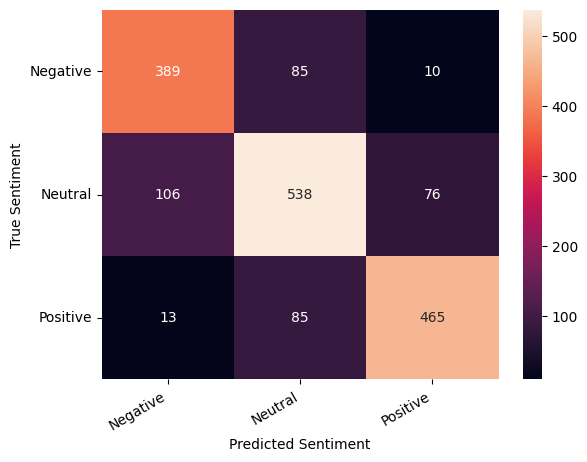

In [ ]:
cm = confusion_matrix(y_test, y_pred) #run on test data
df_cm = pd.DataFrame(cm, index=target_names, columns = target_names)
show_confusion_matrix(df_cm)

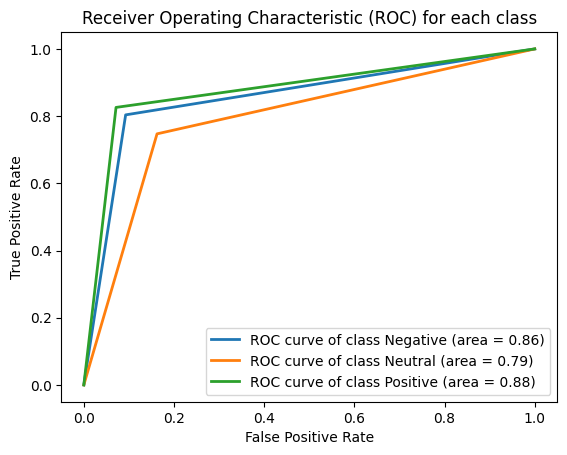

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the labels
labels = ["Negative", "Neutral", "Positive"]
all_true_labels_bin = label_binarize(y_test, classes=[0, 1, 2])
all_predictions_bin = label_binarize(y_pred, classes=[0, 1, 2])

plt.figure()
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(all_true_labels_bin[:, i], all_predictions_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(label, roc_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for each class')
plt.legend(loc="lower right")
plt.show()

ROC-кривая наблюдения:

Наблюдение «Степень изгиба»: Чем более выпуклой или изогнутой является ROC-кривая в сторону верхнего левого угла, тем лучше классификатор. Кривые для классов Positive и Negative демонстрируют полное отсутствие выпуклости, что я бы отнес к частному случаю.

Гипотеза: вероятно существует какая-то особенность данных